<a href="https://colab.research.google.com/github/RoyNandini/cardiovascular-disease-prediction-/blob/main/CVD_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARDIOVASCULAR DISEASE PREDICTION

In [ ]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns  # plot


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn import metrics


In [ ]:
# id ID number
# age in days
# gender   1 - women, 2 - men
# height   cm
# weight   kg
# ap_hi    Systolic blood pressure
# ap_lo    Diastolic blood pressure
# cholesterol   1: normal, 2: above normal, 3: well above normal
# gluc     1: normal, 2: above normal, 3: well above normal
# smoke    whether patient smokes or not
# alco     Binary feature
# active   Binary feature
# cardio   Target variable

DATA PREPROCESSING AND VISUALIZATION

In [ ]:
df = pd.read_csv('/content/cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.head()
#Systolic blood pressure = ap_hi
#Diastolic blood pressure = ap_lo

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


DATA CLEANING


In [ ]:
df.drop('id',axis=1,inplace=True)


In [ ]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

<ipython-input-14-b90164567120>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["gender"])


<Axes: xlabel='gender', ylabel='Density'>

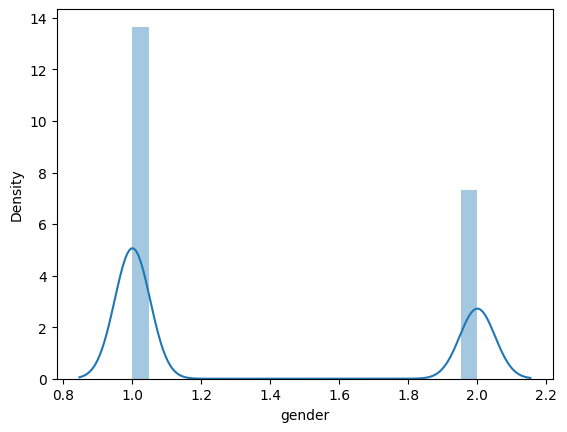

In [ ]:
sns.distplot(df["gender"])


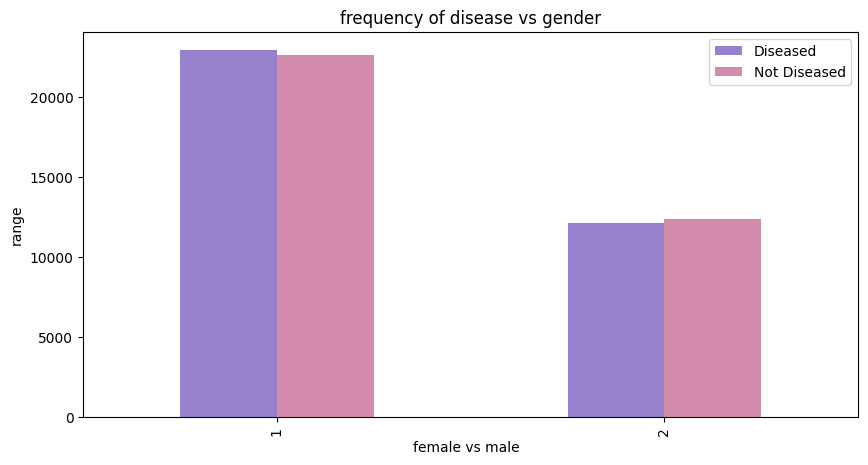

In [ ]:
pd.crosstab(df.gender, df.cardio).plot(kind="bar",figsize=(10,5),color=['#9781cc','#d48cac' ])
plt.title("frequency of disease vs gender")
plt.ylabel('range')
plt.xlabel('female vs male  ')
plt.legend(["Diseased","Not Diseased"])
plt.show()

<Axes: xlabel='gender', ylabel='count'>

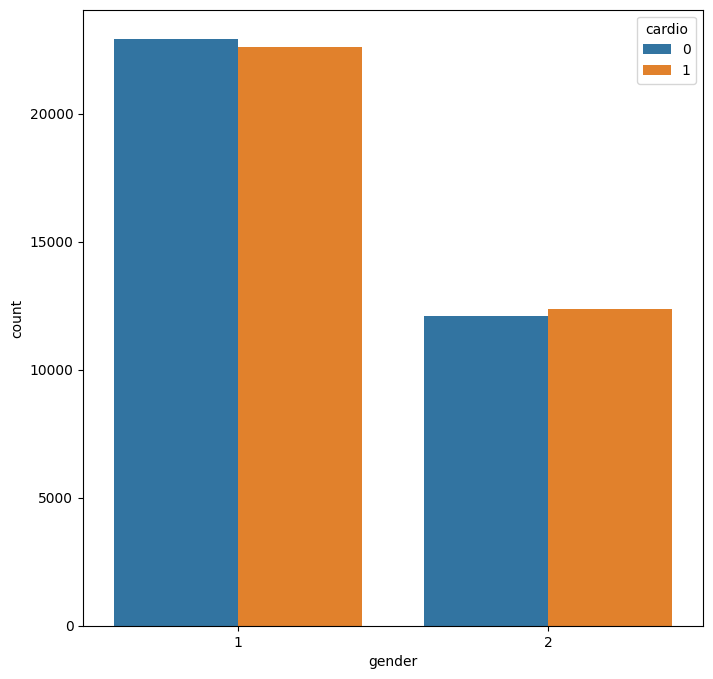

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,8
sns.countplot(x='gender',hue='cardio',data=df)

In [ ]:
df.cardio.value_counts()


0    35021
1    34979
Name: cardio, dtype: int64

In [ ]:
diseased=(len(df[df.cardio==1])/len(df.cardio))*100
diseased_male=len(df[(df.cardio==1) & (df.gender==1)])/len(df.cardio)*100
diseased_female=len(df[(df.cardio==1) & (df.gender==2)])/len(df.cardio)*100

print("\n{:.2f}% of the total count were diseased,\n amoung which {:.2f}% were female  and {:.2f}% were male ".format(diseased,diseased_male,diseased_female))



49.97% of the total count were diseased,
 amoung which 32.31% were female  and 17.66% were male 


In [ ]:
non_diseased=(len(df[df.cardio==0])/len(df.cardio))*100
non_diseased_male=len(df[(df.cardio==0) & (df.gender==1)])/len(df.cardio)*100
non_diseased_female=len(df[(df.cardio==0) & (df.gender==2)])/len(df.cardio)*100
print("\n{:.2f}% of the total count were  not diseased,\n amoung which {:.2f}% were female and {:.2f}% were male".format(non_diseased,non_diseased_male,non_diseased_female))


50.03% of the total count were  not diseased,
 amoung which 32.73% were female and 17.30% were male


<Axes: xlabel='cardio', ylabel='age'>

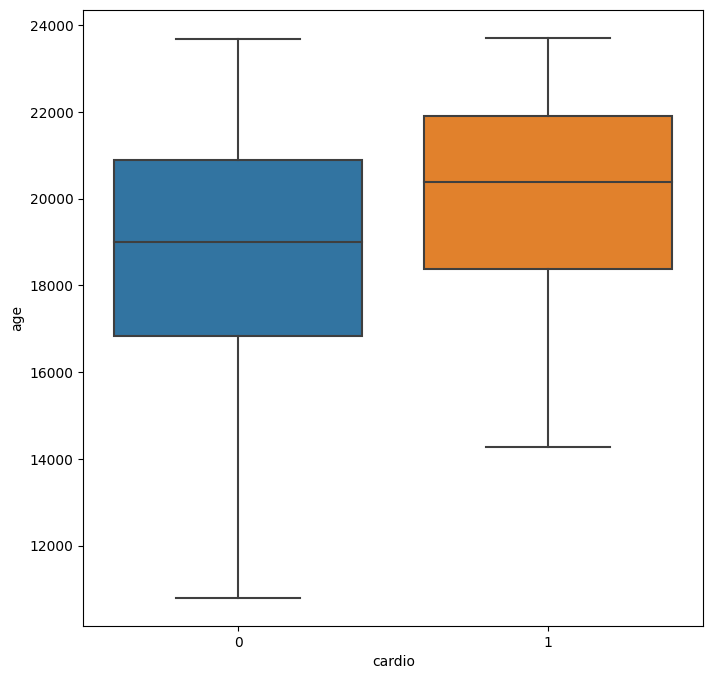

In [ ]:
sns.boxplot(x='cardio',y='age',data=df)

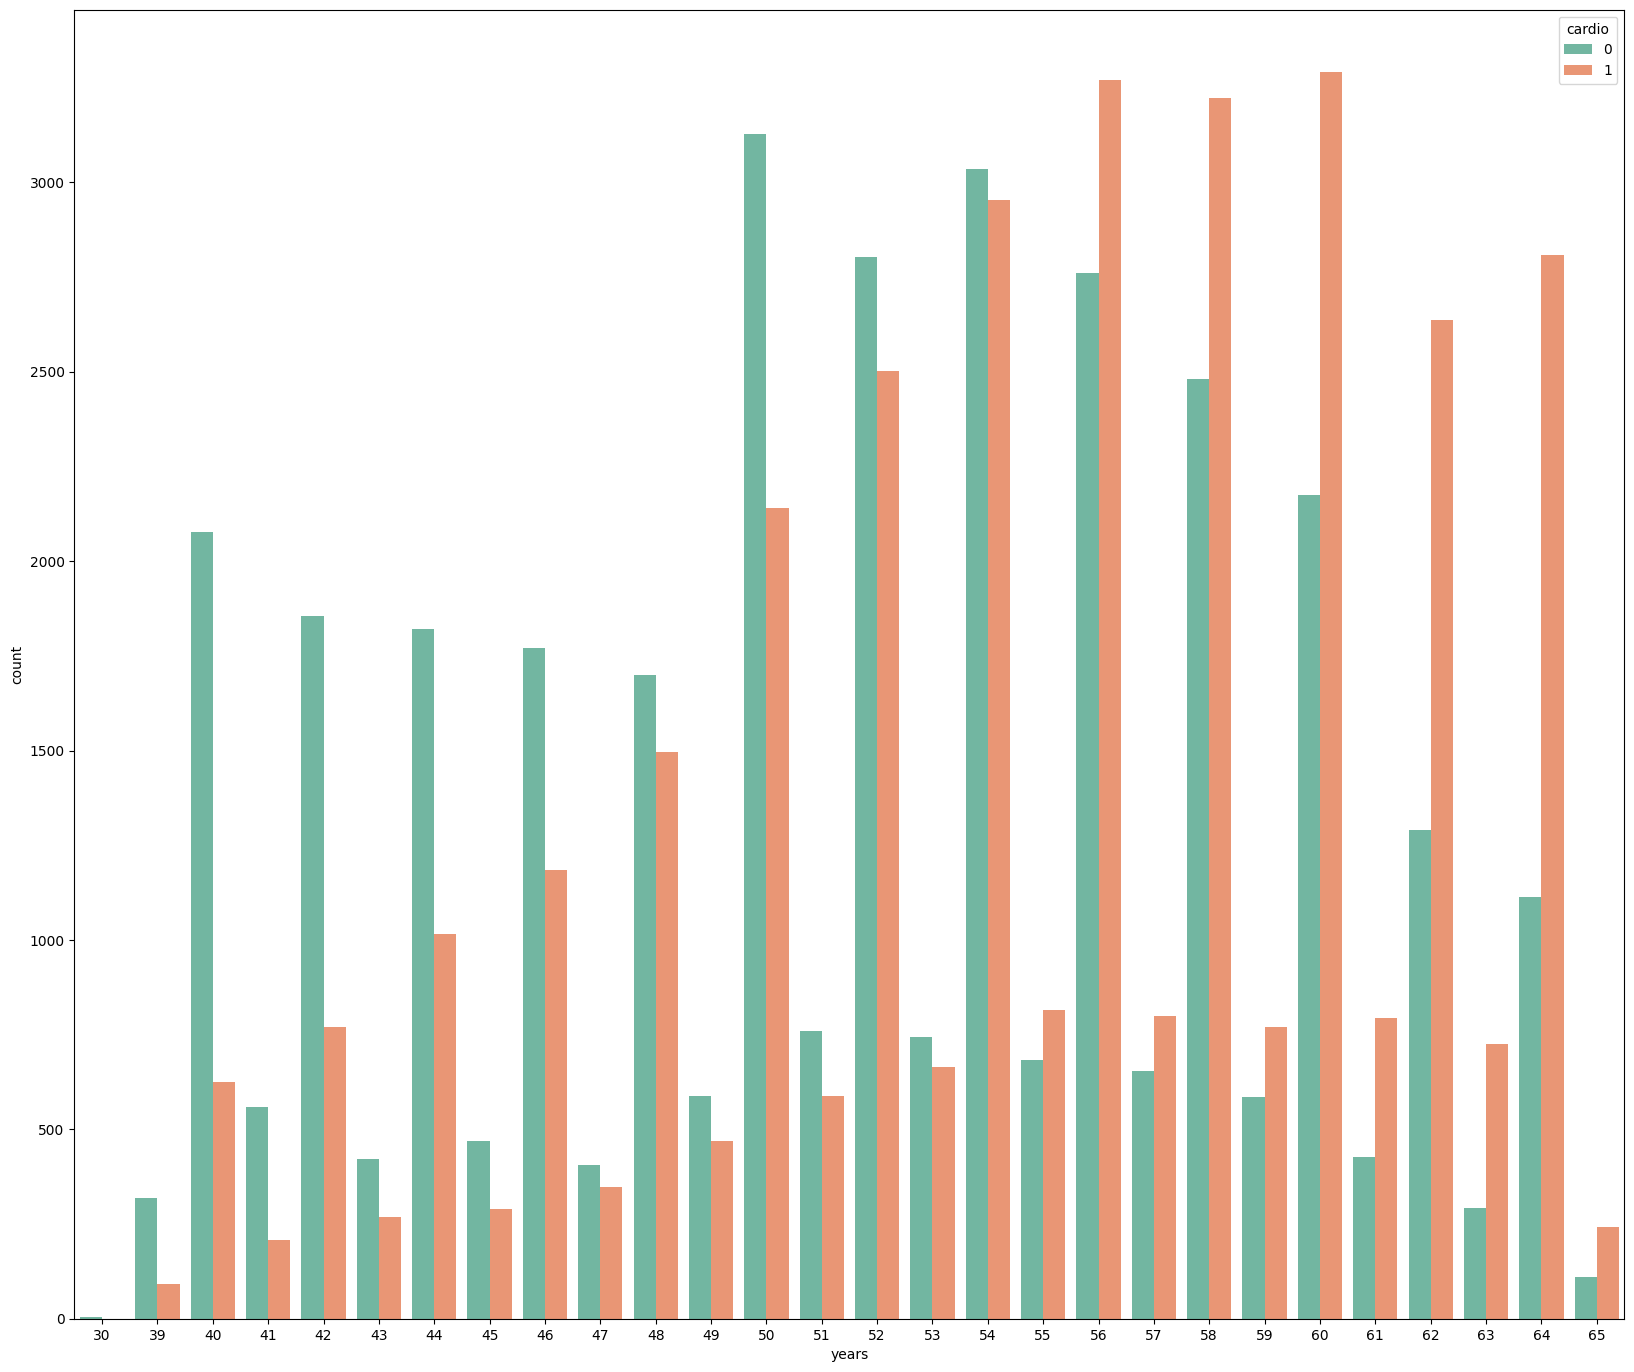

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 17
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

In [ ]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


WE CAN SEE THAT THE OUTLIERS IN ap-hi, ap-lo, weight and height, so we remove weights and heights that fall below 2.5% or above 97.5%



---
OVERFITTING


In [ ]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) |(df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

<Axes: xlabel='cardio', ylabel='weight'>

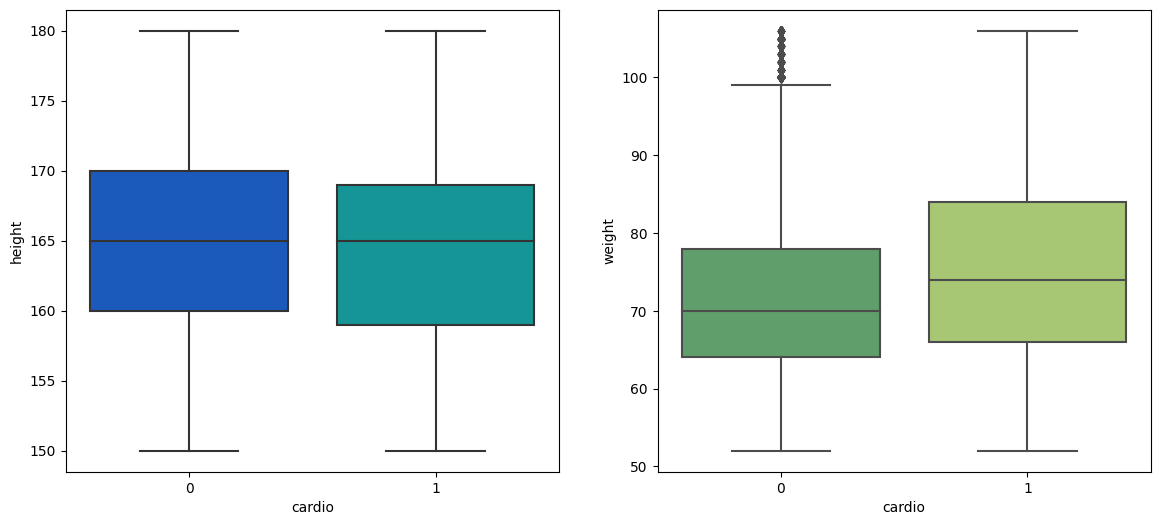

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=df,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=df,palette='summer')

NOW WE REMOVE ap_hi and ap_lo that fall below 2.5% or above 97.5%
Systolic blood pressure = ap_hi, Diastolic blood pressure = ap_lo and  blood pressure could not be negative value

In [ ]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [ ]:
#Let's get rid of the outliers, moreover blood pressure could not be negative value

In [ ]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


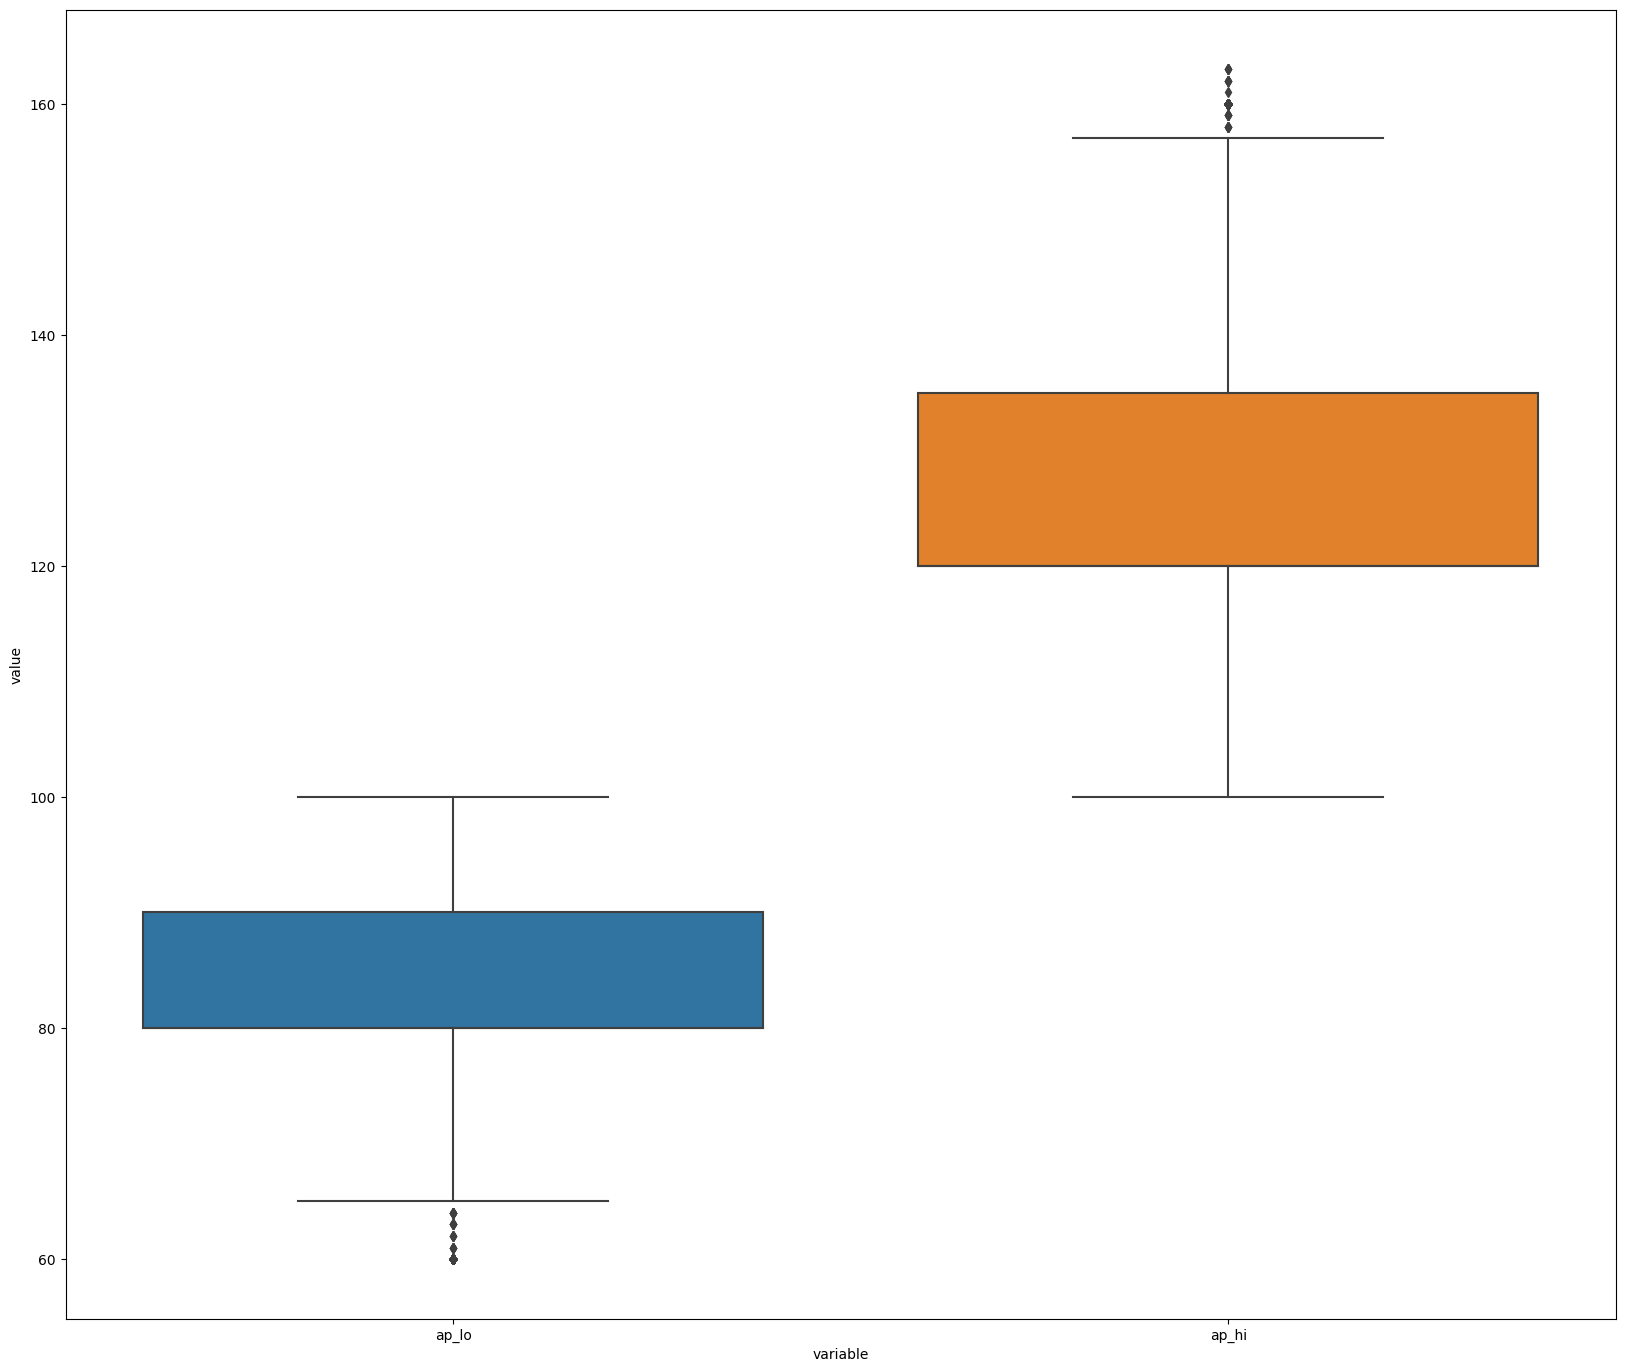

In [ ]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

In [ ]:

df.groupby('gender')['alco'].sum()

gender
1     973
2    2147
Name: alco, dtype: int64

In [ ]:
#Body Mass Index (BMI):
#BMI = mass(kg) / height(m2)
#Normal BMI values are said to be from 18.5 to 25.
# Drinking women have higher risks for CVD than drinking men based on thier BMI.



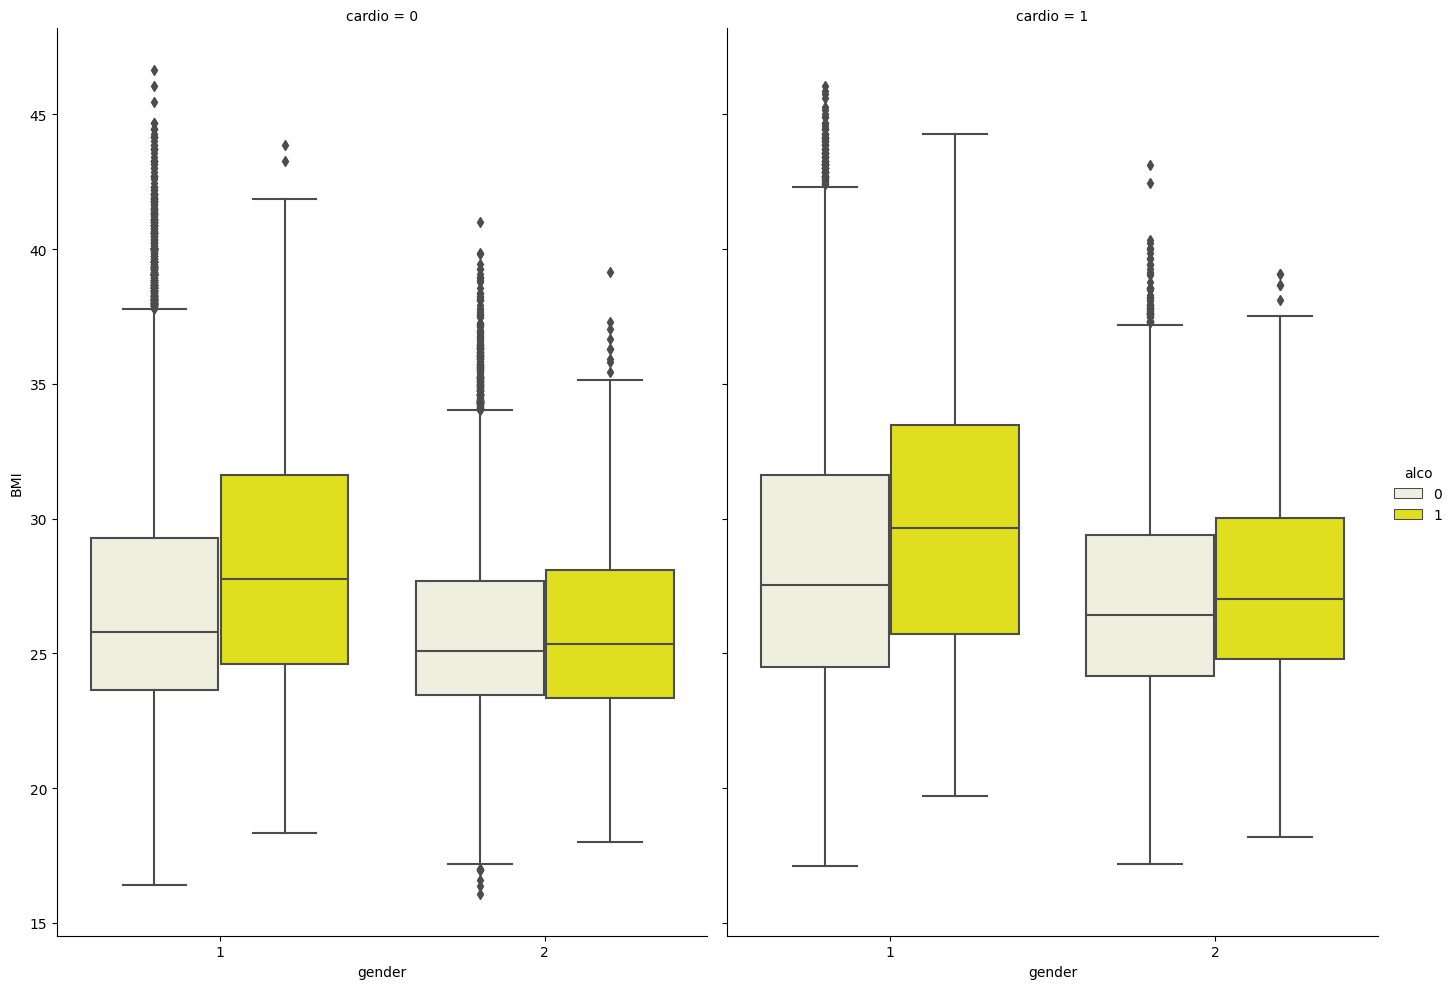

In [ ]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

<ipython-input-32-77c27e18cc6f>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


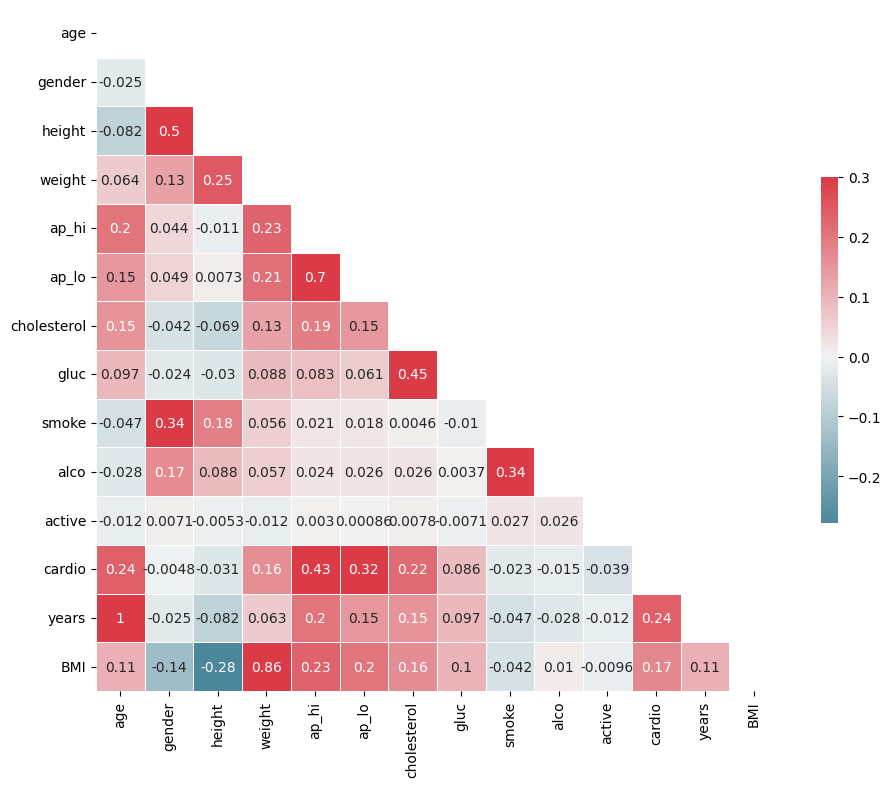

In [ ]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<function matplotlib.pyplot.show(close=None, block=None)>

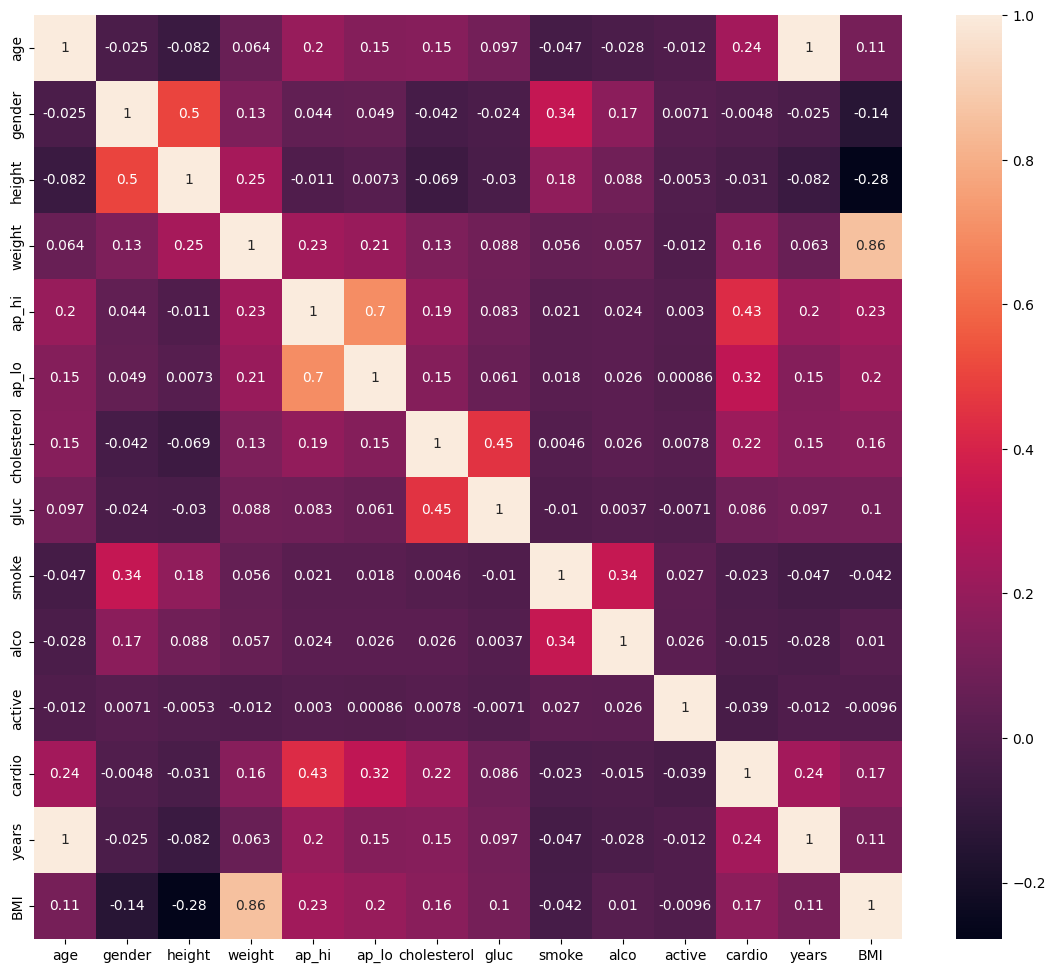

In [ ]:
#sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
sns.heatmap(df.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show

In [ ]:
x=df[['weight','ap_hi','ap_lo','cholesterol','years','BMI']]
#Found array with dim 3. Estimator expected <= 2. #[:,np.newaxis]
y=df['cardio'].values

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.35,random_state=40)

In [ ]:
Classifiers = list()




In [ ]:

knn=KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_x,train_y)
y_pred_KN = knn.predict(test_x)
accuracy = knn.score(test_x,test_y)


In [ ]:
max1=0
k=0
for j in range(2,31):
    knn=KNeighborsClassifier(n_neighbors = j )
    knn.fit(train_x,train_y)
    y_pred_KN = knn.predict(test_x)
    accuracy = knn.score(test_x,test_y)
    if(accuracy > max1):
        max1 = accuracy
        k = j





In [ ]:
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_x,train_y)
    y_pred_KN = knn.predict(test_x)
    Classifiers.append(y_pred_KN)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(train_x,train_y)
y_pred_Deci = DTR.predict(test_x)
Classifiers.append(y_pred_Deci)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=500,random_state=0)
RFC.fit(train_x,train_y)
y_pred_RF = RFC.predict(test_x)
Classifiers.append(y_pred_RF)

In [ ]:
BAG = BaggingClassifier( n_estimators=140,random_state = 222)
BAG.fit(train_x,train_y)
BAG_pred = BAG.predict(test_x)
Classifiers.append(BAG_pred)


In [ ]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
pred_y = logreg.predict(test_x)
Classifiers.append(pred_y)


In [ ]:
Class = ['KNeighbors' ,'DecisionTree', 'RandomForest','BaggingClassifier','LogisticRegression']
score=list()
a=0
index=0
from sklearn.metrics import accuracy_score
for pred in range(len(Classifiers)):
    if a < accuracy_score(test_y,Classifiers[pred]):
        a = accuracy_score(test_y,Classifiers[pred])
        index=pred

    print("accuracy of {} classifier is {:.2f}%".format(Class[pred],accuracy_score(test_y,Classifiers[pred])*100))

print("\nbest classifier is {} and the accuracy is {:.2f}%".format(Class[index],a*100))

accuracy of KNeighbors classifier is 71.55%
accuracy of DecisionTree classifier is 62.99%
accuracy of RandomForest classifier is 68.66%
accuracy of BaggingClassifier classifier is 67.97%
accuracy of LogisticRegression classifier is 72.14%

best classifier is LogisticRegression and the accuracy is 72.14%


In [ ]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
pred_y = logreg.predict(test_x)
Classifiers.append(pred_y)
print('accuracy = {:.2f}'.format(logreg.score(test_x,test_y)))

accuracy = 0.72


In [ ]:
confusion_matrix = pd.crosstab(test_y,pred_y, rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)

Predicted     0     1
Actual               
0          8573  2266
1          3598  6613


In [ ]:
from sklearn.metrics import roc_auc_score
print( 'roc_auc:\n',roc_auc_score(test_y,pred_y))

roc_auc:
 0.719287513581522


In [ ]:
print('Confusion Matrix =  \n\n',confusion_matrix)
print('\n  \n\n classification_report=\n \n',classification_report(test_y,pred_y))

Confusion Matrix =  

 Predicted     0     1
Actual               
0          8573  2266
1          3598  6613

  

 classification_report=
 
               precision    recall  f1-score   support

           0       0.70      0.79      0.75     10839
           1       0.74      0.65      0.69     10211

    accuracy                           0.72     21050
   macro avg       0.72      0.72      0.72     21050
weighted avg       0.72      0.72      0.72     21050

